In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('smoke_detection_iot.csv')

In [3]:
data.head(100)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,1654733426,21.323,53.65,23,419,12528,19619,939.799,0.22,0.69,0.39,0.788,0.449,95,0
96,96,1654733427,21.336,53.96,33,421,12524,19614,939.801,0.20,0.63,0.36,0.718,0.409,96,0
97,97,1654733428,21.349,54.25,21,417,12530,19610,939.795,0.16,0.49,0.28,0.561,0.320,97,0
98,98,1654733429,21.362,54.52,19,418,12529,19626,939.799,0.14,0.44,0.25,0.501,0.286,98,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [5]:
data=data.drop(columns=['Unnamed: 0'])

In [6]:
data.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [7]:
data.eq(0).sum()

UTC                   0
Temperature[C]        1
Humidity[%]           0
TVOC[ppb]          2698
eCO2[ppm]             0
Raw H2                0
Raw Ethanol           0
Pressure[hPa]         0
PM1.0               140
PM2.5               118
NC0.5               182
NC1.0                80
NC2.5                88
CNT                   5
Fire Alarm        17873
dtype: int64

In [8]:
X=data.iloc[:,0:14]
Y=data.iloc[:,-1]

PHƯƠNG PHÁP LỌC

Information Gain

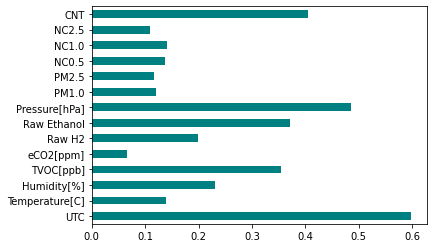

In [9]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline
importances=mutual_info_classif(X,Y)
feat_importances=pd.Series(importances,data.columns[0:len(data.columns)-1])
feat_importances.plot(kind='barh',color='teal')
plt.show()

Chi-square Test

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_abs=abs(X)
chi2_features=SelectKBest(score_func=chi2,k=5)
X_kbest_features=chi2_features.fit(X_abs,Y)
print(X_kbest_features)

SelectKBest(k=5, score_func=<function chi2 at 0x00000292A606F5E0>)


In [11]:
df_scores = pd.DataFrame(X_kbest_features.scores_)
df_columns = pd.DataFrame(X.columns)
f_Scores = pd.concat([df_columns,df_scores],axis=1)           
f_Scores.columns = ['Specs','Score']  

In [12]:
f_Scores

,Specs,Score
0,UTC,6.944436e+04
1,Temperature[C],8.772939e+03
2,Humidity[%],1.621287e+04
3,TVOC[ppb],9.074694e+07
4,eCO2[ppm],3.195058e+06
5,Raw H2,4.113416e+03
6,Raw Ethanol,1.366792e+05
7,Pressure[hPa],7.379664e+00
8,PM1.0,6.475750e+06
9,PM2.5,9.561944e+06


In [13]:
f_Scores.nlargest(5,'Score')

,Specs,Score
13,CNT,1.561393e+08
3,TVOC[ppb],9.074694e+07
10,NC0.5,3.806091e+07
11,NC1.0,1.035192e+07
9,PM2.5,9.561944e+06


Fisher’s Score

from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt
%matplotlib inline
ranks=fisher_score.fisher_score(X,Y)
feat_importances=pd.Series(importances,data.columns[0:len(data.columns)-1])
feat_importances.plot(kind='barh',color='teal')
plt.show()

Correlation Coefficient

<AxesSubplot:>

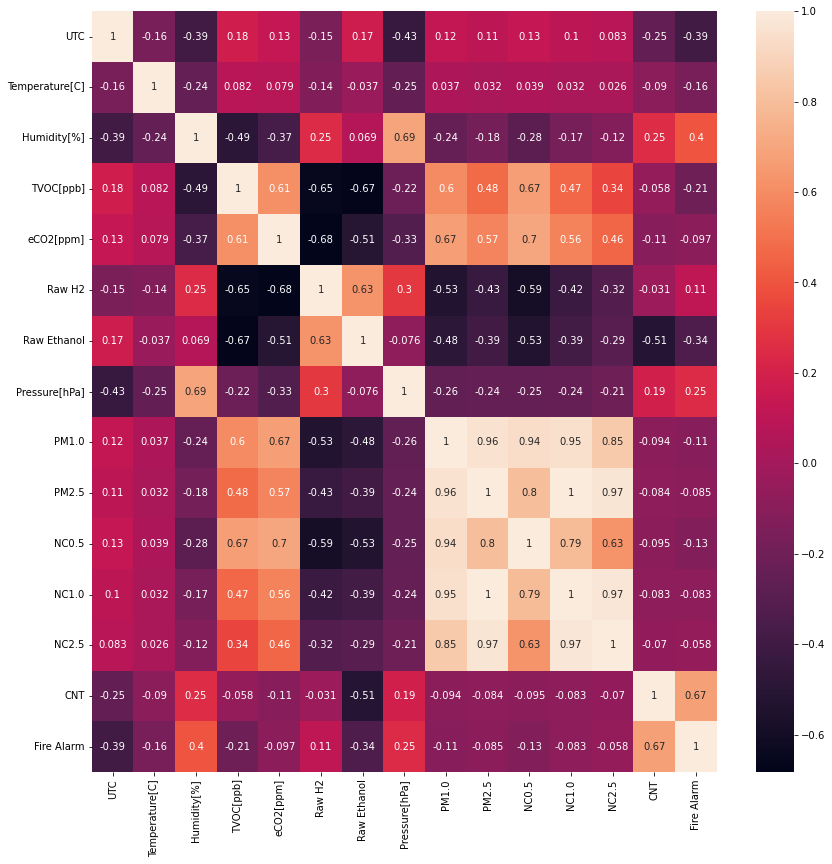

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=data.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True)

In [15]:
corr.nlargest(5,'Fire Alarm')['Fire Alarm']

Fire Alarm       1.000000
CNT              0.673762
Humidity[%]      0.399846
Pressure[hPa]    0.249797
Raw H2           0.107007
Name: Fire Alarm, dtype: float64

Variance Threshold

In [16]:
from sklearn.feature_selection import VarianceThreshold
X=data.iloc[:,0:14]
v_threshold=VarianceThreshold(threshold=0.2)
v_threshold.fit(X)
v_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

Mean Absolute Difference (MAD)

<BarContainer object of 14 artists>

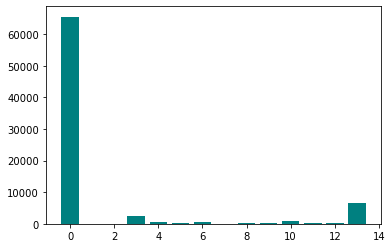

In [17]:
import numpy as np
mean_abs_diff=np.sum(np.abs(X-np.mean(X,axis=0)),axis=0)/X.shape[0]
plt.bar(np.arange(X.shape[1]),mean_abs_diff,color='teal')

Dispersion ratio

In [18]:
Features=X.columns
X.head()
X.shape[0]

62630

C:\Users\Hi\anaconda3\lib\site-packages\numpy\core\_methods.py:51: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)


<BarContainer object of 14 artists>

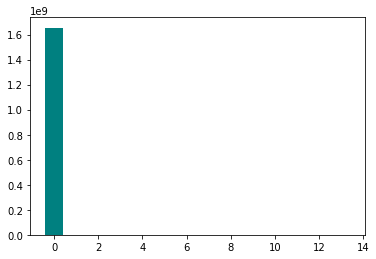

In [19]:
X=data.iloc[:,0:14]
AM=np.mean(X,axis=0)
GM=np.power(np.prod(X),1/X.shape[0])
disp_ratio=AM/GM
plt.bar(np.arange(X.shape[1]),AM,color='teal')
#plt.bar(np.arange(X.shape[1]),GM,color='teal')

In [20]:
GM

UTC               0.0
Temperature[C]    NaN
Humidity[%]       inf
TVOC[ppb]         0.0
eCO2[ppm]         0.0
Raw H2            0.0
Raw Ethanol       0.0
Pressure[hPa]     inf
PM1.0             0.0
PM2.5             0.0
NC0.5             0.0
NC1.0             0.0
NC2.5             0.0
CNT               0.0
dtype: float64

Phương pháp gói

Forward Feature Selection

In [21]:
X=data.iloc[:,0:14]
Y=data.iloc[:,-1]

In [23]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(class_weight='balanced',solver='lbfgs',random_state=42,n_jobs=-1)
ffs=SequentialFeatureSelector(lr,k_features='best',forward=True,n_jobs=-1)
ffs.fit(X,Y)
features=list(ffs.k_feature_names_)
#features=list(map(int,features))
lr.fit(X[features],Y)
y_pred=lr.predict(X[features])

In [24]:
X[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Humidity[%]    62630 non-null  float64
 1   TVOC[ppb]      62630 non-null  int64  
 2   eCO2[ppm]      62630 non-null  int64  
 3   Raw H2         62630 non-null  int64  
 4   Raw Ethanol    62630 non-null  int64  
 5   Pressure[hPa]  62630 non-null  float64
 6   PM1.0          62630 non-null  float64
 7   PM2.5          62630 non-null  float64
 8   NC1.0          62630 non-null  float64
 9   CNT            62630 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 4.8 MB


Backward Feature Elimination

In [26]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(class_weight='balanced',solver='lbfgs',random_state=42,n_jobs=-1,max_iter=500)
lr.fit(X,Y)
bfs=SequentialFeatureSelector(lr,k_features='best',forward=False,n_jobs=-1)
bfs.fit(X,Y)
features=list(bfs.k_feature_names_)
#features=list(map(int,features))
lr.fit(X[features],Y)
y_pred=lr.predict(X[features])

In [27]:
X[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Humidity[%]  62630 non-null  float64
 1   TVOC[ppb]    62630 non-null  int64  
 2   eCO2[ppm]    62630 non-null  int64  
 3   Raw H2       62630 non-null  int64  
 4   Raw Ethanol  62630 non-null  int64  
 5   PM1.0        62630 non-null  float64
 6   PM2.5        62630 non-null  float64
 7   NC2.5        62630 non-null  float64
 8   CNT          62630 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 4.3 MB


Exhaustive Feature Selection

In [28]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.ensemble import RandomForestClassifier

efs=ExhaustiveFeatureSelector(RandomForestClassifier(),min_features=5,max_features=14,scoring='roc_auc',cv=2)
efs=efs.fit(X,Y)
selected_features=X.columns[list(efs.best_idx_)]
selected_features,efs.best_score_

Recursive Feature Elimination

In [88]:
from sklearn.feature_selection import RFE
rfe=RFE(lr,n_features_to_select=7)
rfe.fit(X,Y)
y_pred=rfe.predict(X)

In [89]:
X

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739
62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740
62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741
62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742


Phương pháp nhúng

LASSO Regularization (L1)

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
logistic=LogisticRegression(C=1,penalty="l1",solver='liblinear',random_state=7).fit(X,Y)
model=SelectFromModel(logistic,prefit=True)
X_new=model.transform(X)
selected_columns=selected_features.columns[selected_features.var()!=0]
selected_columns

NameError: name 'selected_features' is not defined

Random Forest Importance

In [91]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=340)
model.fit(X,Y)
importances=model.feature_importances_
final_df=pd.DataFrame({"Features":pd.DataFrame(X).columns,"Importances":importances})
final_df.set_index('Importances')
final_df.sort_values('Importances')
final_df.plot.bar(color='teal')

ImportError: cannot import name '_check_feature_names_in' from 'sklearn.utils.validation' (C:\Users\Hi\anaconda3\lib\site-packages\sklearn\utils\validation.py)